In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_summary import DataFrameSummary
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("../artifacts/train.csv")
df['date'] = pd.to_datetime(df['hour'].astype(str), format='%y%m%d%H')
#df['id'] = df['id'].astype('int64')
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,date
0,7316267034048054272.00,0,14103022,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,0,22813,320,50,2647,2,39,100148,23,2014-10-30 22:00:00
1,7316382476282737664.00,0,14103022,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,22676,320,50,2616,0,35,-1,51,2014-10-30 22:00:00
2,7316503485423912960.00,0,14103022,1005,1,e59ef3fc,0a4015b2,335d28a8,ecad2386,7801e8d9,...,0,22221,320,50,2560,3,43,100182,61,2014-10-30 22:00:00
3,7316665494169525248.00,0,14103022,1005,0,a82179f8,62b6befe,3e814130,ecad2386,7801e8d9,...,2,17239,320,50,1973,3,39,100148,23,2014-10-30 22:00:00
4,7316667139836903424.00,0,14103022,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,0,17653,300,250,1994,2,39,-1,33,2014-10-30 22:00:00


In [3]:
df.drop(columns=['hour'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                100000 non-null  float64       
 1   click             100000 non-null  int64         
 2   C1                100000 non-null  int64         
 3   banner_pos        100000 non-null  int64         
 4   site_id           100000 non-null  object        
 5   site_domain       100000 non-null  object        
 6   site_category     100000 non-null  object        
 7   app_id            100000 non-null  object        
 8   app_domain        100000 non-null  object        
 9   app_category      100000 non-null  object        
 10  device_id         100000 non-null  object        
 11  device_ip         100000 non-null  object        
 12  device_model      100000 non-null  object        
 13  device_type       100000 non-null  int64         
 14  devic

In [5]:
df.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,9013539922146241536.00,0.17,1005.01,0.19,1.00,0.34,21022.71,318.99,61.31,2390.22,1.40,183.16,53472.50,94.51
std,4984982111218394112.00,0.37,0.92,0.44,0.33,0.83,4117.55,18.09,48.09,513.01,1.36,296.03,49947.17,87.39
min,77975851859728.00,0.00,1002.00,0.00,0.00,0.00,375.00,216.00,36.00,112.00,0.00,33.00,-1.00,13.00
25%,5194120758050359296.00,0.00,1005.00,0.00,1.00,0.00,20153.00,320.00,50.00,2299.00,0.00,35.00,-1.00,23.00
50%,8844926947749439488.00,0.00,1005.00,0.00,1.00,0.00,22676.00,320.00,50.00,2616.00,2.00,39.00,100013.00,51.00
75%,12934978166197374976.00,0.00,1005.00,0.00,1.00,0.00,23438.00,320.00,50.00,2676.00,3.00,171.00,100148.00,221.00
max,18446696367114328064.00,1.00,1012.00,7.00,5.00,5.00,24052.00,1024.00,1024.00,2758.00,3.00,1831.00,100248.00,253.00


In [6]:
# Reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [7]:
df = reduce_mem_usage(df)

Mem. usage decreased to 59.13 Mb (12.1% reduction)


In [8]:
df.shape

(100000, 24)

In [9]:
df_summary = DataFrameSummary(df)
df_summary.columns_stats.T

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\pandas_summary\__init__.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.corr = df.corr()


,counts,uniques,missing,missing_perc,types
id,100000,99787,0,0%,numeric
click,100000,2,0,0%,bool
C1,100000,5,0,0%,numeric
banner_pos,100000,6,0,0%,numeric
site_id,100000,759,0,0%,categorical
site_domain,100000,668,0,0%,categorical
site_category,100000,16,0,0%,categorical
app_id,100000,764,0,0%,categorical
app_domain,100000,53,0,0%,categorical
app_category,100000,19,0,0%,categorical


In [10]:
df['id'].nunique()/ df.shape[0]

0.99787

In [11]:
# droping id column
df.drop(columns=['id'], inplace=True)

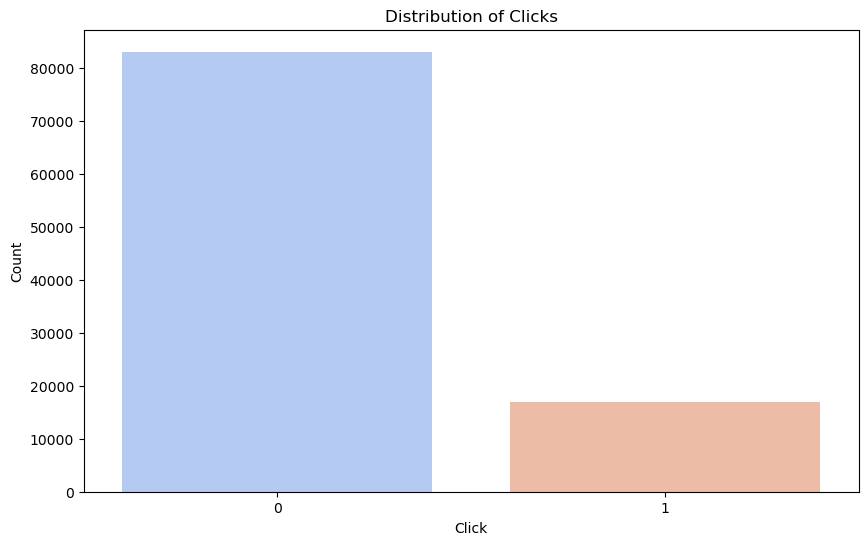

In [12]:
# Plotting the distribution of clicks
plt.figure(figsize=(10, 6))
sns.countplot(x='click', data=df, palette='coolwarm')
plt.title('Distribution of Clicks')
plt.xlabel('Click')
plt.ylabel('Count')
plt.show()

In [13]:
df['click'].value_counts(normalize=True)

0   0.83
1   0.17
Name: click, dtype: float64

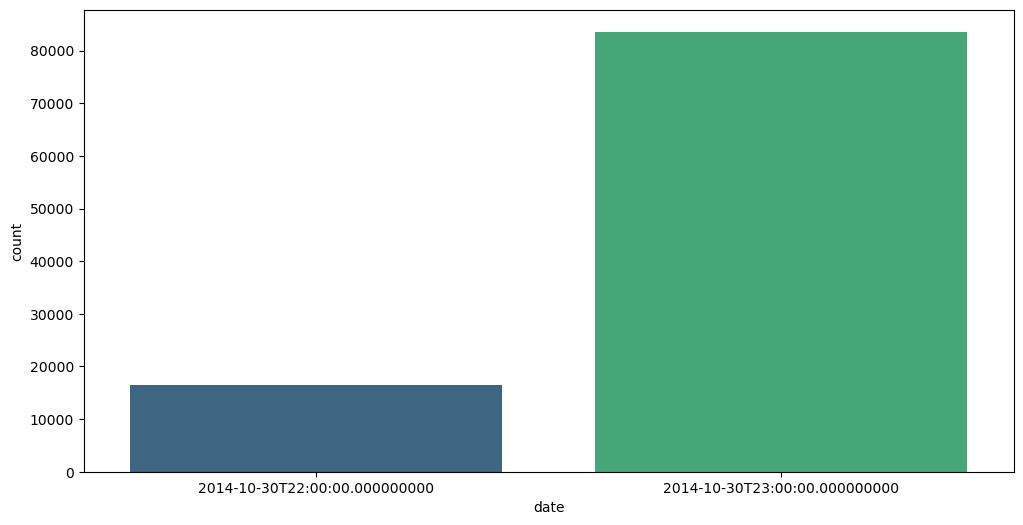

In [14]:
# Bar plot of date
plt.figure(figsize=(12, 6))
sns.countplot(x='date', data=df, palette='viridis')
plt.show()

In [15]:
# dropping date column as there are only 2 unique values
df.drop(columns=['date'], inplace=True)

In [16]:
df.describe()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,0.17,1005.01,0.19,1.00,0.34,21022.71,318.99,61.31,2390.22,1.40,183.16,53472.50,94.51
std,0.37,0.92,0.44,0.33,0.83,4117.55,18.09,48.09,513.01,1.36,296.03,49947.17,87.39
min,0.00,1002.00,0.00,0.00,0.00,375.00,216.00,36.00,112.00,0.00,33.00,-1.00,13.00
25%,0.00,1005.00,0.00,1.00,0.00,20153.00,320.00,50.00,2299.00,0.00,35.00,-1.00,23.00
50%,0.00,1005.00,0.00,1.00,0.00,22676.00,320.00,50.00,2616.00,2.00,39.00,100013.00,51.00
75%,0.00,1005.00,0.00,1.00,0.00,23438.00,320.00,50.00,2676.00,3.00,171.00,100148.00,221.00
max,1.00,1012.00,7.00,5.00,5.00,24052.00,1024.00,1024.00,2758.00,3.00,1831.00,100248.00,253.00


##### The columns C15, C16, C19 and C21 have outliers

In [17]:
# Dealing with the outliers
col = ['C15', 'C16', 'C19', 'C21']
for col in col:
    percentiles = df[col].quantile(0.98)
    if df[col].quantile(0.98) < 0.5 * df[col].max():
        df[df[col] >= percentiles][col] = percentiles

C:\Users\User\AppData\Local\Temp\ipykernel_24112\4035551645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[col] >= percentiles][col] = percentiles
C:\Users\User\AppData\Local\Temp\ipykernel_24112\4035551645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df[col] >= percentiles][col] = percentiles


In [18]:
# numerical columns
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
num_cols.remove('click')  # Exclude the target variable 'click' from numerical columns

# categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Displaying the numerical columns
print("Numerical Columns:")
print(num_cols)
# Displaying the categorical columns
print("Categorical Columns:")
print(cat_cols)

Numerical Columns:
['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
Categorical Columns:
['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


In [19]:
# get numerical columns that have less than 50 unique values
num_cat_cols = {col:df[col].nunique() for col in num_cols if df[col].nunique() < 50}
num_cat_cols

{'C1': 5,
 'banner_pos': 6,
 'device_type': 4,
 'device_conn_type': 4,
 'C15': 7,
 'C16': 8,
 'C18': 4,
 'C19': 39,
 'C21': 31}

In [20]:
# Remove numerical columns with less than 50 unique values from num_cols
num_cols = [col for col in num_cols if col not in num_cat_cols]
# Add the numerical categorical columns to cat_cols
cat_cols.extend(num_cat_cols.keys())
# Displaying the updated numerical and categorical columns  
print("Updated Numerical Columns:")
print(num_cols)
print("Updated Categorical Columns:")
print(cat_cols)

Updated Numerical Columns:
['C14', 'C17', 'C20']
Updated Categorical Columns:
['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C19', 'C21']


### Categorical Column Analysis

In [21]:
print(cat_cols)

['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C19', 'C21']


#### Column: site_id

In [22]:
print("Unique Value Count:", df['site_id'].nunique())
print("Top 10 Site IDs:")
print(df['site_id'].value_counts().head(10))

Unique Value Count: 759
Top 10 Site IDs:
85f751fd    50704
1fbe01fe    18535
e151e245     8171
5b08c53b     2462
d9750ee7     1456
c36224b6      809
5b4d2eda      779
83a0ad1a      599
93eaba74      568
856e6d3f      537
Name: site_id, dtype: int64


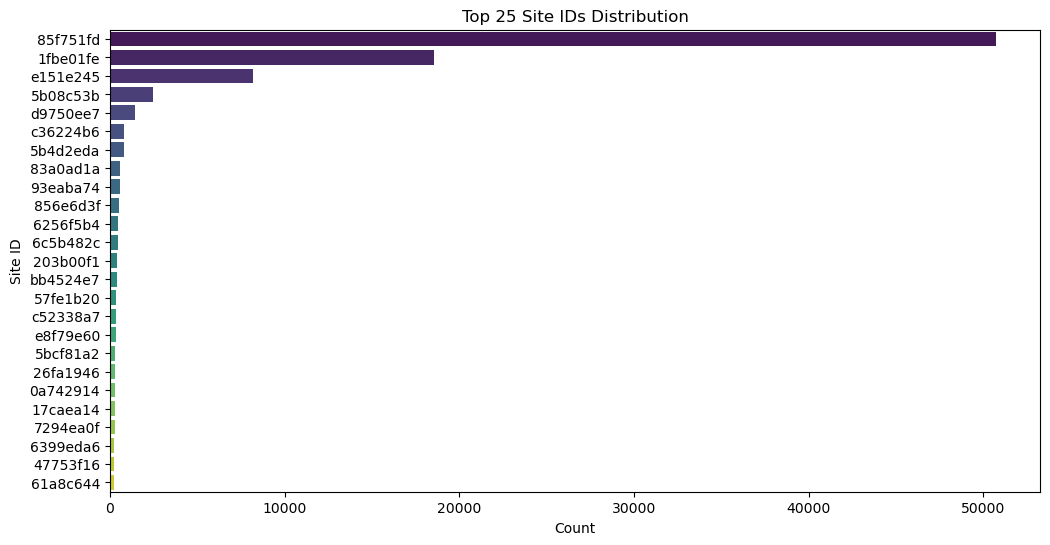

In [23]:
# Distribution plot for top 25 site_id
plt.figure(figsize=(12, 6))
sns.countplot(y='site_id', data=df, order=df['site_id'].value_counts().index[:25], palette='viridis')
plt.title('Top 25 Site IDs Distribution')
plt.xlabel('Count')
plt.ylabel('Site ID')
plt.show()

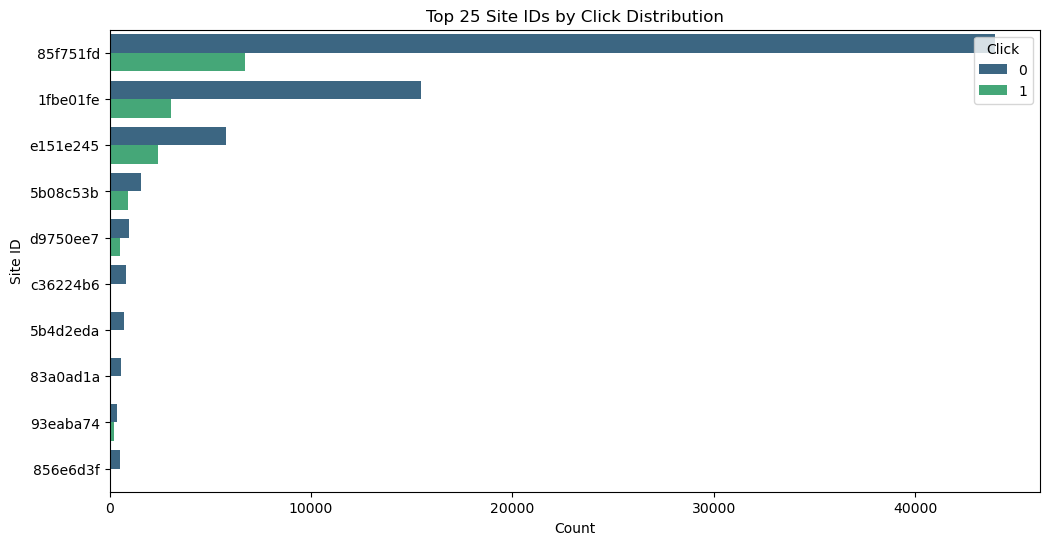

In [24]:
# Distribution of site_id by click
plt.figure(figsize=(12, 6))
sns.countplot(y='site_id', hue='click', data=df, order=df['site_id'].value_counts().index[:10], palette='viridis')
plt.title('Top 25 Site IDs by Click Distribution')
plt.xlabel('Count')
plt.ylabel('Site ID')
plt.legend(title='Click', loc='upper right')    
plt.show()

In [25]:
# Site ID having maximum clicks
max_click_site = df[df['click'] == 1]['site_id'].value_counts().idxmax() 
print(f"Site ID: {max_click_site} has the maximum clicks: {df[df['site_id'] == max_click_site]['click'].sum()}")   

Site ID: 85f751fd has the maximum clicks: 6721


In [26]:
# Average clicks per site id
df.groupby('site_id')['click'].mean().sort_values(ascending=False).head(10)

site_id
3df53a0f   1.00
bf21acac   1.00
2ca46df5   1.00
a16f4e1f   1.00
5380ca88   1.00
6b175d24   1.00
50cf8ee6   1.00
50aad368   1.00
d8f4e9e8   1.00
b7eed96d   1.00
Name: click, dtype: float64

#### Column: site_domain

In [27]:
print("Unique Value Count:", df['site_category'].nunique())
print("Top 10 Site Categories:")
print(df['site_category'].value_counts())


Unique Value Count: 16
Top 10 Site Categories:
50e219e0    53413
28905ebd    19539
f028772b    18732
3e814130     5797
335d28a8     1078
f66779e6      386
dedf689d      371
8fd0aea4      224
75fa27f6      205
70fb0e29      111
76b2941d       73
c0dd3be3       34
72722551       27
0569f928        8
5378d028        1
42a36e14        1
Name: site_category, dtype: int64


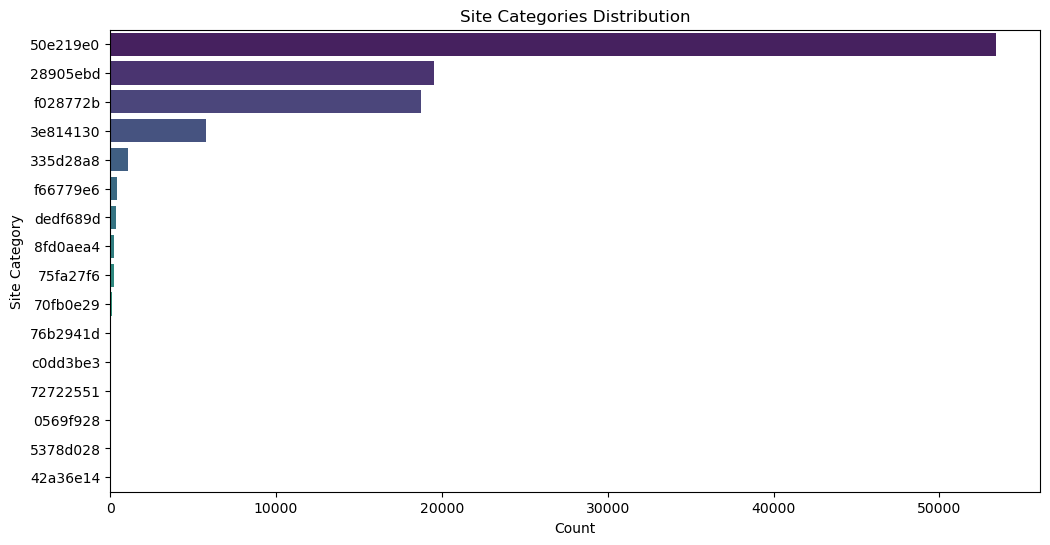

In [28]:
# Distribution plot for site_category
plt.figure(figsize=(12, 6))
sns.countplot(y='site_category', data=df, order=df['site_category'].value_counts().index, palette='viridis')
plt.title('Site Categories Distribution')
plt.xlabel('Count')
plt.ylabel('Site Category')
plt.show()

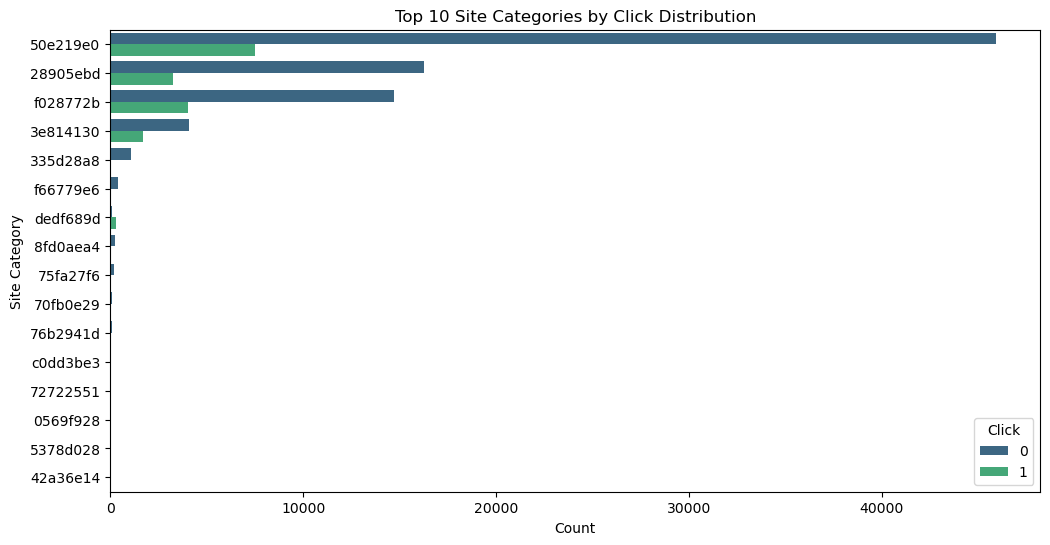

In [29]:
# Distribution of site_category by click
plt.figure(figsize=(12, 6))
sns.countplot(y='site_category', hue='click', data=df, order=df['site_category'].value_counts().index, palette='viridis')
plt.title('Top 10 Site Categories by Click Distribution')
plt.xlabel('Count')
plt.ylabel('Site Category')
plt.legend(title='Click', loc='lower right')
plt.show()

In [30]:
# Site Category having maximum clicks
max_click_site = df[df['click'] == 1]['site_category'].value_counts().idxmax() 
print(f"Site Category: {max_click_site} has the maximum clicks: {df[df['site_category'] == max_click_site]['click'].sum()}")  

Site Category: 50e219e0 has the maximum clicks: 7490


In [31]:
# Average clicks per site category
df.groupby('site_category')['click'].mean().sort_values(ascending=False)

site_category
dedf689d   0.81
3e814130   0.29
f028772b   0.22
28905ebd   0.17
50e219e0   0.14
c0dd3be3   0.12
75fa27f6   0.04
70fb0e29   0.03
335d28a8   0.03
f66779e6   0.02
8fd0aea4   0.01
0569f928   0.00
42a36e14   0.00
5378d028   0.00
72722551   0.00
76b2941d   0.00
Name: click, dtype: float64

#### Column: app_id

In [32]:
print("Unique Value Count:", df['app_id'].nunique())
print("Top 10 App IDs:")
print(df['app_id'].value_counts().head(10))

Unique Value Count: 764
Top 10 App IDs:
ecad2386    49296
9c13b419     9356
e2fcccd2     5803
d36838b1     4712
685d1c4c     4025
febd1138     2939
3c4b944d     2068
7e7baafa     1761
98fed791     1371
51cedd4e     1022
Name: app_id, dtype: int64


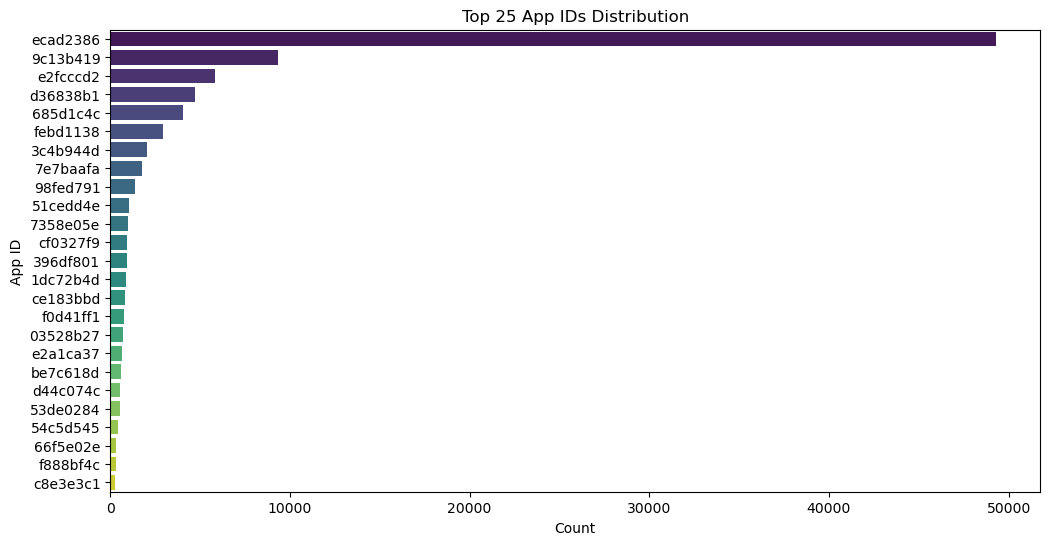

In [33]:
# Distribution plot for top 25 app_id
plt.figure(figsize=(12, 6))
sns.countplot(y='app_id', data=df, order=df['app_id'].value_counts().index[:25], palette='viridis')
plt.title('Top 25 App IDs Distribution')
plt.xlabel('Count')
plt.ylabel('App ID')
plt.show()

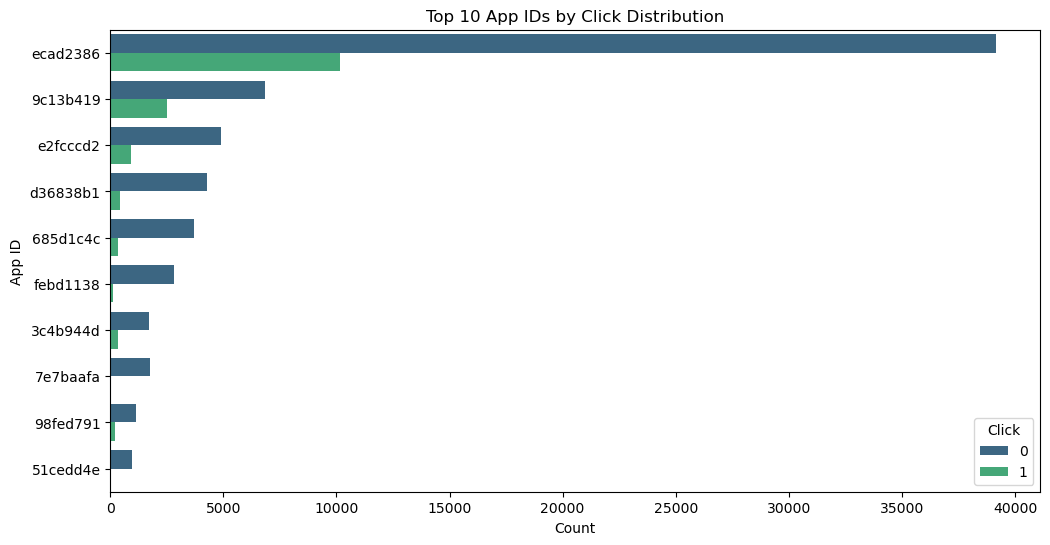

In [34]:
# Distribution of app_id by click
plt.figure(figsize=(12, 6))
sns.countplot(y='app_id', hue='click', data=df, order=df['app_id'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 App IDs by Click Distribution')
plt.xlabel('Count')
plt.ylabel('App ID')
plt.legend(title='Click', loc='lower right')
plt.show()

In [35]:
# App ID having maximum clicks
max_click_app = df[df['click'] == 1]['app_id'].value_counts().idxmax() 
print(f"App ID: {max_click_app} has the maximum clicks: {df[df['app_id'] == max_click_app]['click'].sum()}")  

App ID: ecad2386 has the maximum clicks: 10139


In [36]:
# Average clicks per app id
df.groupby('app_id')['click'].mean().sort_values(ascending=False).head(10) 

app_id
83330330   1.00
4ef7908f   1.00
9a5663b7   1.00
54e87ea1   1.00
e656aec4   1.00
9ae85c23   1.00
57b26263   1.00
869f835b   1.00
2017a228   1.00
ec999fb0   1.00
Name: click, dtype: float64

#### Column: app_domain

In [37]:
print("Unique Value Count:", df['app_domain'].nunique())
print("Top 10 App Domains:")
print(df['app_domain'].value_counts().head(10))

Unique Value Count: 53
Top 10 App Domains:
7801e8d9    51129
2347f47a    26236
5c5a694b     5804
0e8616ad     4712
d9b5648e     3184
82e27996     2939
ae637522     1760
aefc06bd     1110
b9528b13      999
6f7ca2ba      302
Name: app_domain, dtype: int64


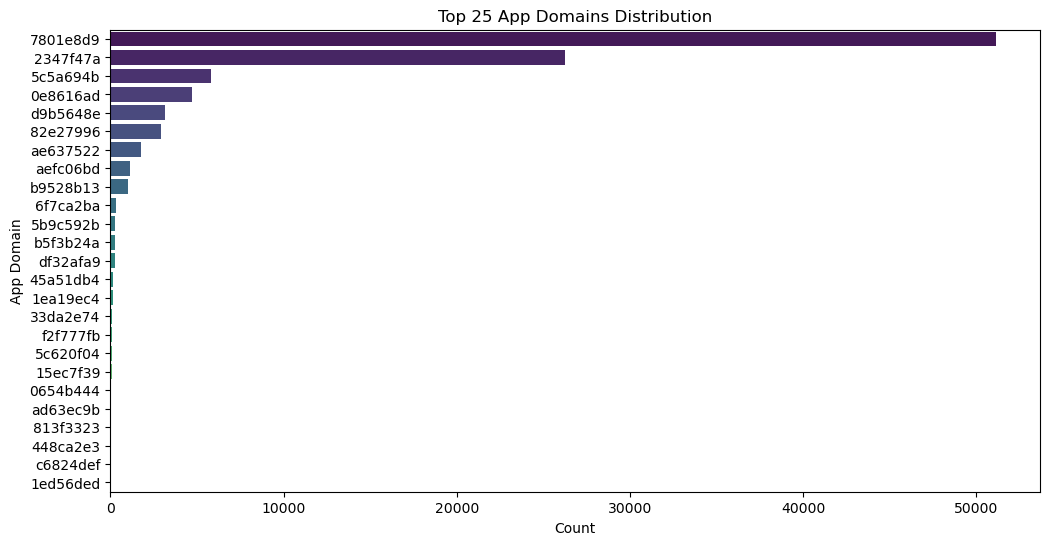

In [38]:
# Distribution plot for top 10 app domains
plt.figure(figsize=(12, 6))
sns.countplot(y='app_domain', data=df, order=df['app_domain'].value_counts().index[:25], palette='viridis')
plt.title('Top 25 App Domains Distribution')
plt.xlabel('Count')
plt.ylabel('App Domain')
plt.show()

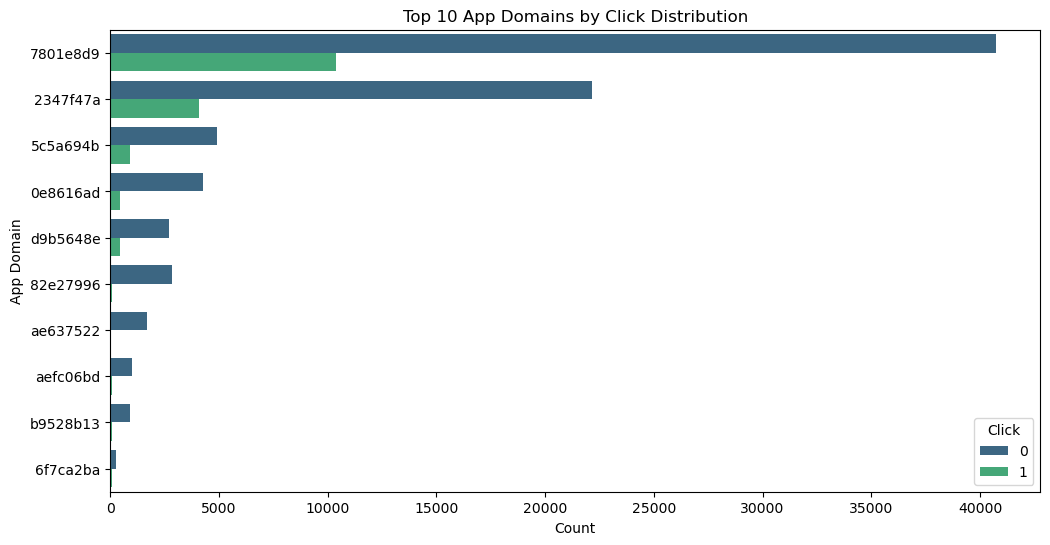

In [39]:
# Distribution of app_domain by click
plt.figure(figsize=(12, 6))
sns.countplot(y='app_domain', hue='click', data=df, order=df['app_domain'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 App Domains by Click Distribution')
plt.xlabel('Count')
plt.ylabel('App Domain')
plt.legend(title='Click', loc='lower right')
plt.show()

In [40]:
# App Domain having maximum clicks
max_click_app = df[df['click'] == 1]['app_domain'].value_counts().idxmax() 
print(f"App Domain: {max_click_app} has the maximum clicks: {df[df['app_domain'] == max_click_app]['click'].sum()}")  

App Domain: 7801e8d9 has the maximum clicks: 10394


In [41]:
# Average clicks per app domain
df.groupby('app_domain')['click'].mean().sort_values(ascending=False).head(10) 

app_domain
26894d3c   1.00
eaaf6d12   1.00
7a94af76   1.00
1cbecd39   1.00
6a0a3a9d   0.33
45a51db4   0.30
33da2e74   0.25
7801e8d9   0.20
6f7ca2ba   0.19
0654b444   0.17
Name: click, dtype: float64

#### Column: app_category

In [42]:
print("Unique Value Count:", df['app_category'].nunique())
print("Top 10 App Categories:")
print(df['app_category'].value_counts().head(10))

Unique Value Count: 19
Top 10 App Categories:
07d7df22    49689
0f2161f8    29634
f95efa07    10461
8ded1f7a     6384
cef3e649     3282
dc97ec06      176
d1327cf5       94
fc6fa53d       88
4ce2e9fc       54
75d80bbe       34
Name: app_category, dtype: int64


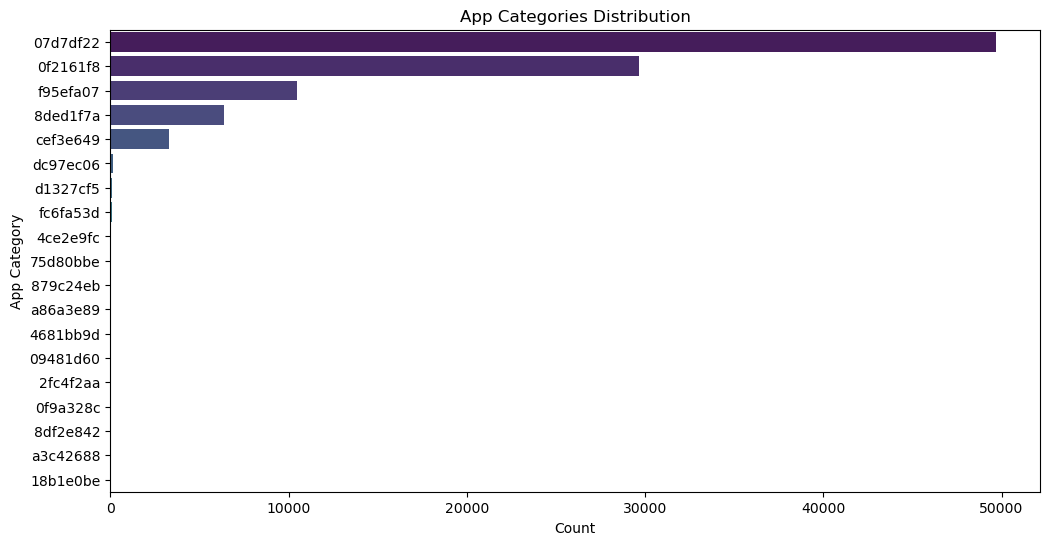

In [43]:
# Distribution plot for app_category
plt.figure(figsize=(12, 6))
sns.countplot(y='app_category', data=df, order=df['app_category'].value_counts().index[:25], palette='viridis')
plt.title('App Categories Distribution')
plt.xlabel('Count')
plt.ylabel('App Category')
plt.show()

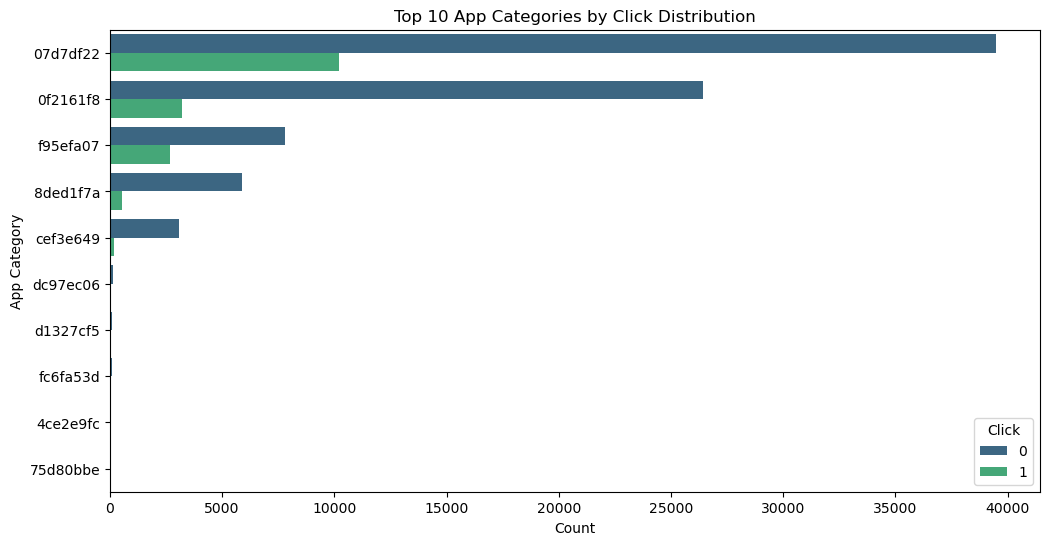

In [44]:
# Distribution of app_category by click
plt.figure(figsize=(12, 6))
sns.countplot(y='app_category', hue='click', data=df, order=df['app_category'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 App Categories by Click Distribution')
plt.xlabel('Count')
plt.ylabel('App Category')
plt.legend(title='Click', loc='lower right')    
plt.show()

In [45]:
# App Category having maximum clicks
max_click_app = df[df['click'] == 1]['app_category'].value_counts().idxmax() 
print(f"App Category: {max_click_app} has the maximum clicks: {df[df['app_category'] == max_click_app]['click'].sum()}")  

App Category: 07d7df22 has the maximum clicks: 10228


In [46]:
# Average clicks per app category
df.groupby('app_category')['click'].mean().sort_values(ascending=False).head(10) 

app_category
a3c42688   0.50
f95efa07   0.25
07d7df22   0.21
a86a3e89   0.18
4681bb9d   0.16
dc97ec06   0.15
0f9a328c   0.12
0f2161f8   0.11
4ce2e9fc   0.09
75d80bbe   0.09
Name: click, dtype: float64

#### Column: device_id

In [47]:
print("Unique Value Count:", df['device_id'].nunique())
print("Top 10 Device IDs:")
print(df['device_id'].value_counts().head(10))

Unique Value Count: 9915
Top 10 Device IDs:
a99f214a    82114
0f7c61dc      412
a5cd53ed      101
9a2d61ee       72
936e92fb       59
ed9b9e01       48
afeffc18       41
c44d59da       34
1635772a       29
0069fcd3       29
Name: device_id, dtype: int64


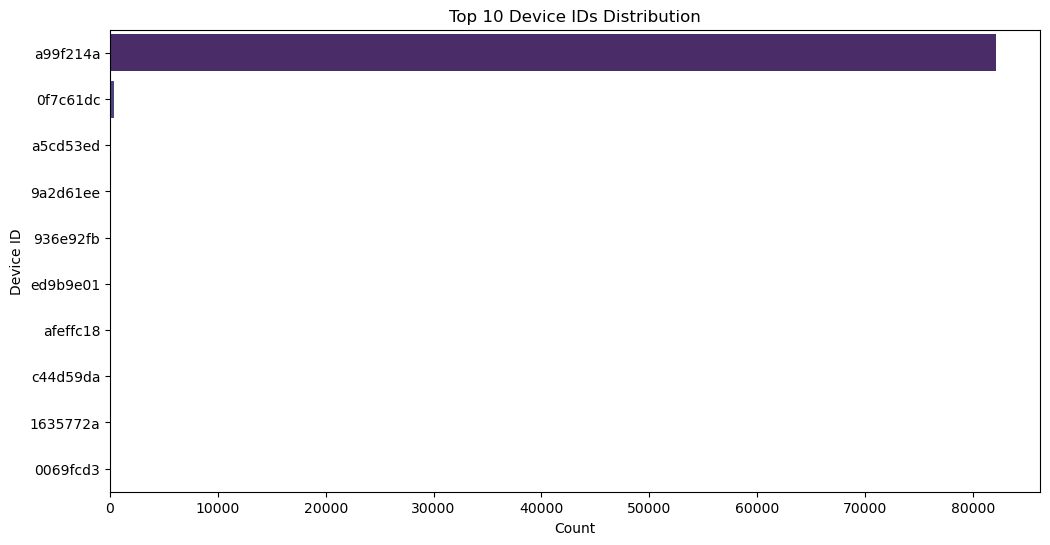

In [48]:
# Distribution plot for top 10 device_id
plt.figure(figsize=(12, 6))
sns.countplot(y='device_id', data=df, order=df['device_id'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Device IDs Distribution')
plt.xlabel('Count')
plt.ylabel('Device ID')
plt.show()

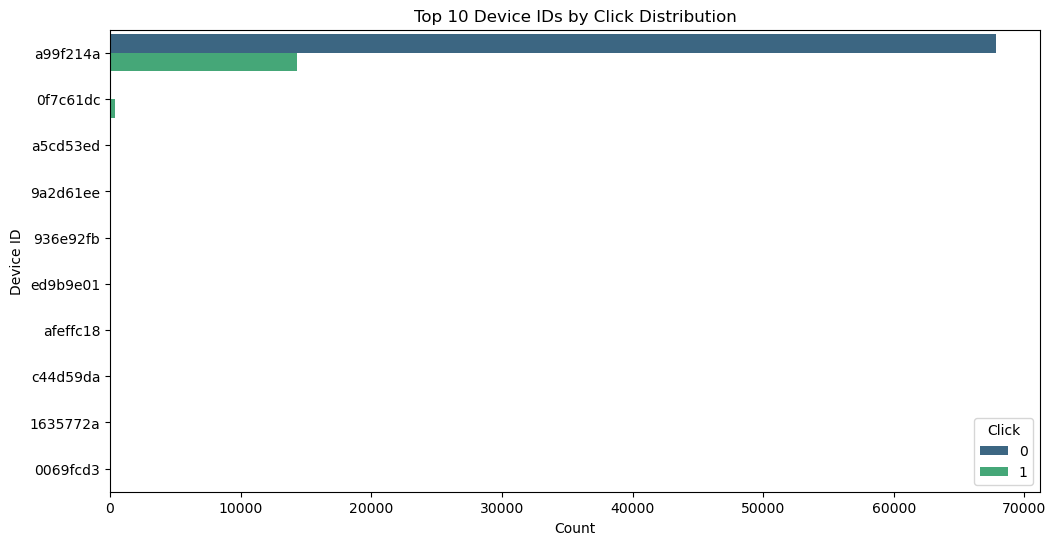

In [49]:
# Distribution of device_id by click
plt.figure(figsize=(12, 6))
sns.countplot(y='device_id', hue='click', data=df, order=df['device_id'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Device IDs by Click Distribution')
plt.xlabel('Count')
plt.ylabel('Device ID')
plt.legend(title='Click', loc='lower right')
plt.show()

In [50]:
# Device ID having maximum clicks
max_click_device = df[df['click'] == 1]['device_id'].value_counts().idxmax() 
print(f"Device ID: {max_click_device} has the maximum clicks: {df[df['device_id'] == max_click_device]['click'].sum()}")  

Device ID: a99f214a has the maximum clicks: 14306


In [51]:
# Average clicks per device id
df.groupby('device_id')['click'].mean().sort_values(ascending=False).head(10)

device_id
c728b980   1.00
29bb8d33   1.00
a4352848   1.00
6db1f665   1.00
297d0180   1.00
29532a32   1.00
de232c8e   1.00
de28f0b0   1.00
de2c54e0   1.00
a40bbce7   1.00
Name: click, dtype: float64

#### Column: device_ip

In [52]:
print("Unique Value Count:", df['device_ip'].nunique())
print("Top 10 Device IPs:")
print(df['device_ip'].value_counts().head(10))

Unique Value Count: 45817
Top 10 Device IPs:
6b9769f2    523
990d2b99    387
431b3174    269
116e4cf3    255
95fad796    198
cdec1ad4    192
ceffea69    181
4a24a18c    176
b0070d9a    168
7ed30f6c    166
Name: device_ip, dtype: int64


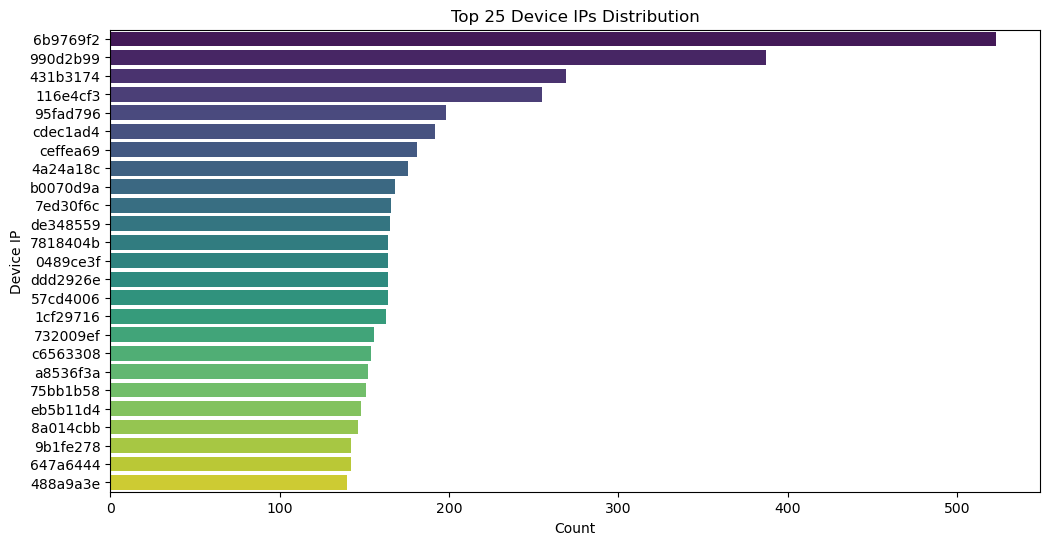

In [53]:
# Distribution plot for top 25 device_ip
plt.figure(figsize=(12, 6))
sns.countplot(y='device_ip', data=df, order=df['device_ip'].value_counts().index[:25], palette='viridis')
plt.title('Top 25 Device IPs Distribution')
plt.xlabel('Count')
plt.ylabel('Device IP')
plt.show()

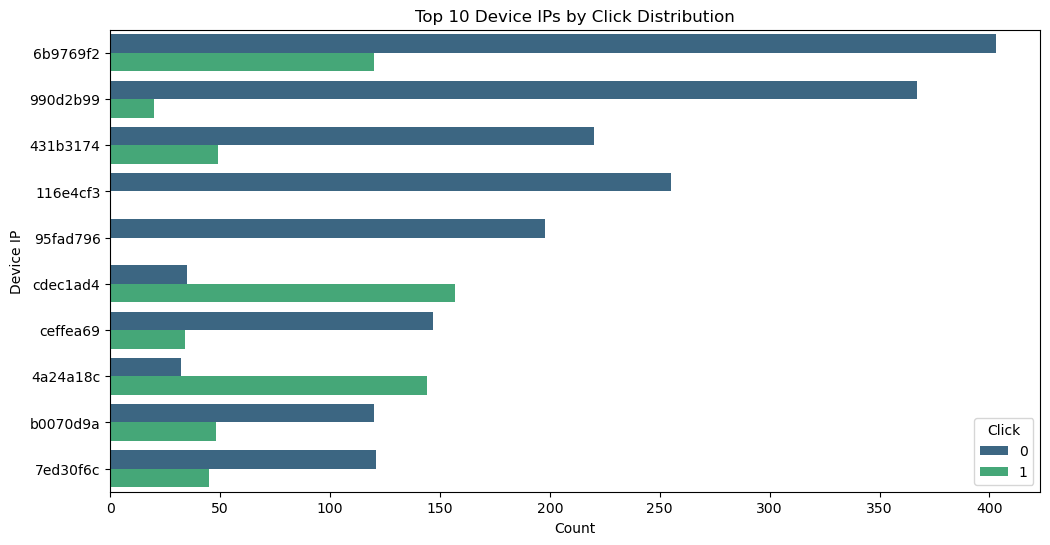

In [54]:
# Distribution of device_ip by click
plt.figure(figsize=(12, 6))
sns.countplot(y='device_ip', hue='click', data=df, order=df['device_ip'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Device IPs by Click Distribution')
plt.xlabel('Count')
plt.ylabel('Device IP')
plt.legend(title='Click', loc='lower right')
plt.show()

In [55]:
# Device IP having maximum clicks
max_click_device = df[df['click'] == 1]['device_ip'].value_counts().idxmax() 
print(f"Device IP: {max_click_device} has the maximum clicks: {df[df['device_ip'] == max_click_device]['click'].sum()}")  

Device IP: cdec1ad4 has the maximum clicks: 157


In [56]:
# Average clicks per device IP
df.groupby('device_ip')['click'].mean().sort_values(ascending=False).head(10) 

device_ip
00013cdc   1.00
6b375529   1.00
6a7c6aad   1.00
6a88c29f   1.00
6a926312   1.00
6a9beb89   1.00
6aa65f4c   1.00
6ac26569   1.00
6ac883e7   1.00
6ae67766   1.00
Name: click, dtype: float64

#### Column: device_model

In [57]:
print("Unique Value Count:", df['device_model'].nunique())
print("Top 10 Device Models:")
print(df['device_model'].value_counts().head(10))

Unique Value Count: 2487
Top 10 Device Models:
8a4875bd    3987
1f0bc64f    3838
d787e91b    3485
7abbbd5c    2097
4ea23a13    1668
5096d134    1581
ecb851b2    1535
be6db1d7    1471
aad45b01    1448
fce66524    1361
Name: device_model, dtype: int64


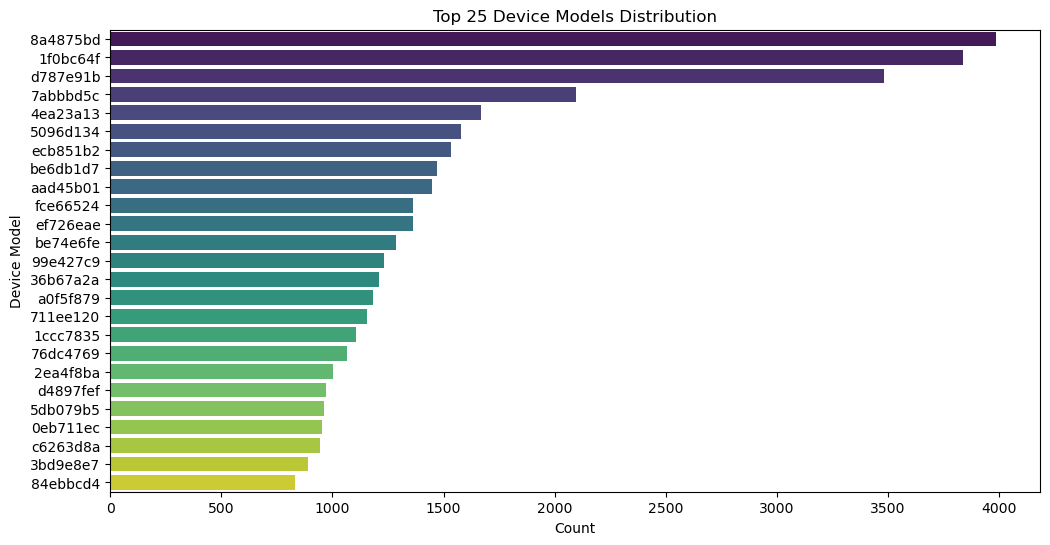

In [58]:
# Distribution plot for top 25 device_model
plt.figure(figsize=(12, 6))
sns.countplot(y='device_model', data=df, order=df['device_model'].value_counts().index[:25], palette='viridis')
plt.title('Top 25 Device Models Distribution')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.show()

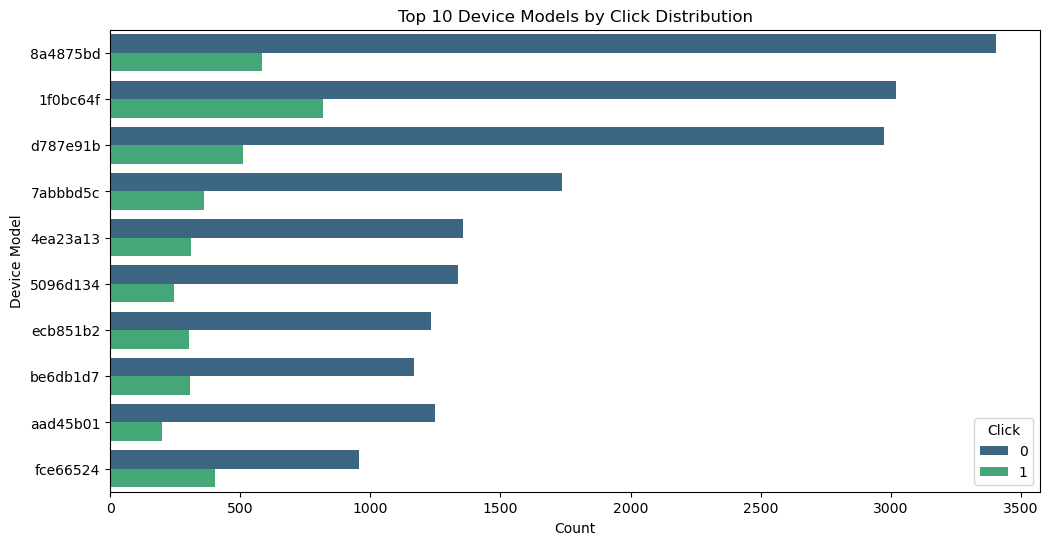

In [59]:
# Distribution of device_model by click
plt.figure(figsize=(12, 6))
sns.countplot(y='device_model', hue='click', data=df, order=df['device_model'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Device Models by Click Distribution')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.legend(title='Click', loc='lower right')
plt.show()

In [60]:
# Device Model having maximum clicks
max_click_device = df[df['click'] == 1]['device_model'].value_counts().idxmax() 
print(f"Device Model: {max_click_device} has the maximum clicks: {df[df['device_model'] == max_click_device]['click'].sum()}") 

Device Model: 1f0bc64f has the maximum clicks: 819


In [61]:
# Average clicks per device_model
df.groupby('device_model')['click'].mean().sort_values(ascending=False).head(10) 

device_model
4fab3c39   1.00
851897aa   1.00
66553d7d   1.00
8741c65a   1.00
c4410fa6   1.00
08e8b6f1   1.00
c4be4101   1.00
855ab99e   1.00
d0265f48   1.00
dfcdc0fd   1.00
Name: click, dtype: float64

### Statistical Significance Test for Categorical Variables: Chi-Square

In [62]:
significant_categorical_cols = []
alpha = 0.05

for col in cat_cols:  
    contingency_table = pd.crosstab(df[col], df['click'].astype('category'))
    chi2, p, dof, exp = chi2_contingency(contingency_table)

    print(col.ljust(40), ',  chisquared=%.5f,   p-value=%.5f' % (chi2, p))
    if p < alpha:
        significant_categorical_cols.append(col)

site_id                                  ,  chisquared=8060.44593,   p-value=0.00000
site_domain                              ,  chisquared=4973.61612,   p-value=0.00000
site_category                            ,  chisquared=2664.25221,   p-value=0.00000
app_id                                   ,  chisquared=4798.69543,   p-value=0.00000
app_domain                               ,  chisquared=1605.65595,   p-value=0.00000
app_category                             ,  chisquared=2482.76959,   p-value=0.00000
device_id                                ,  chisquared=11079.25517,   p-value=0.00000
device_ip                                ,  chisquared=60696.22723,   p-value=0.00000
device_model                             ,  chisquared=7888.69134,   p-value=0.00000
C1                                       ,  chisquared=658.40666,   p-value=0.00000
banner_pos                               ,  chisquared=745.33177,   p-value=0.00000
device_type                              ,  chisquared=303.40707,

In [63]:
significant_categorical_cols

['site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'C18',
 'C19',
 'C21']

### Numerical Column Analysis

In [64]:
print(num_cols)

['C14', 'C17', 'C20']


In [65]:
def plot_numeric_distribution(df, column, target):

    plt.figure(figsize=(14, 5))

    # Plot 1: Overall distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)

    # Plot 2: Distribution by target
    plt.subplot(1, 2, 2)
    if df[target].nunique() <= 10:
        sns.kdeplot(data=df, x=column, hue=target,fill=True)
    else:
        sns.boxplot(x=target, y=column, data=df)
    plt.title(f"Distribution of {column} by {target}")
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

Analyzing C14...


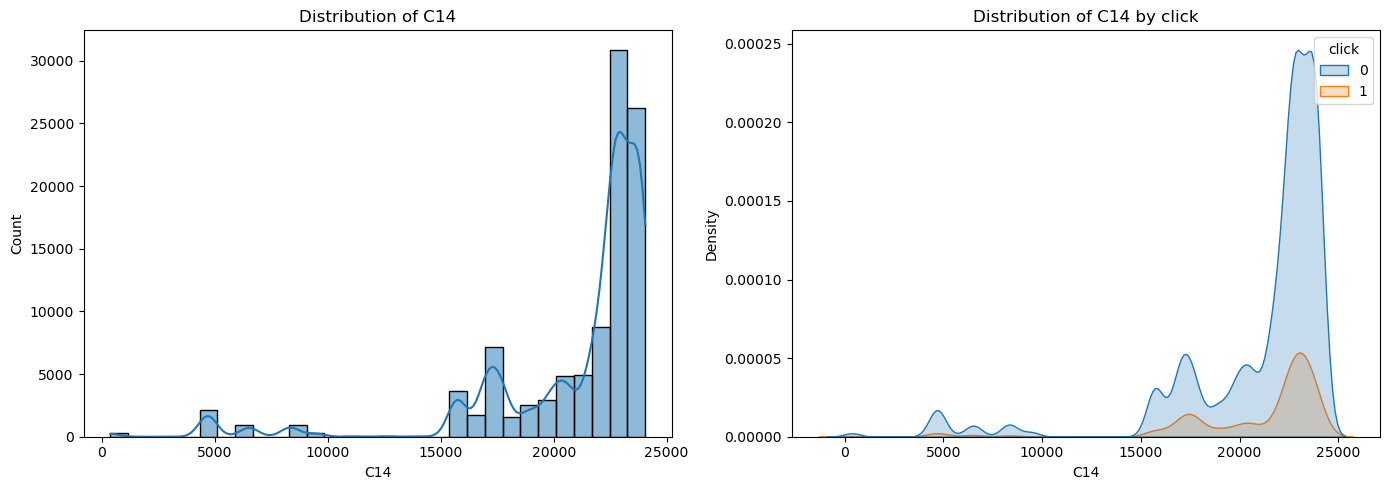



Analyzing C17...


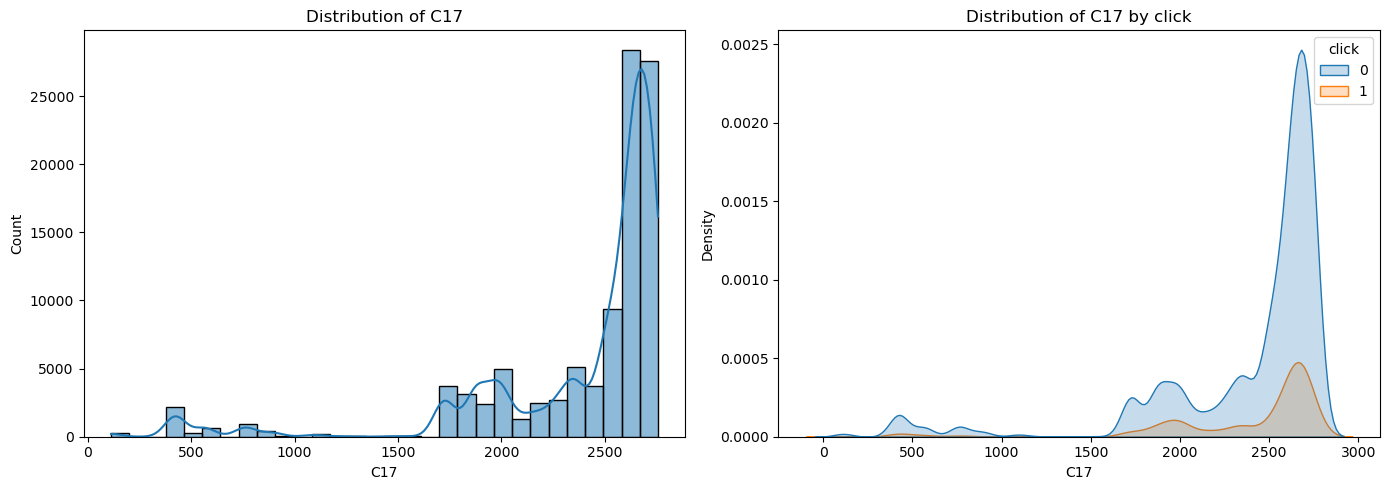



Analyzing C20...


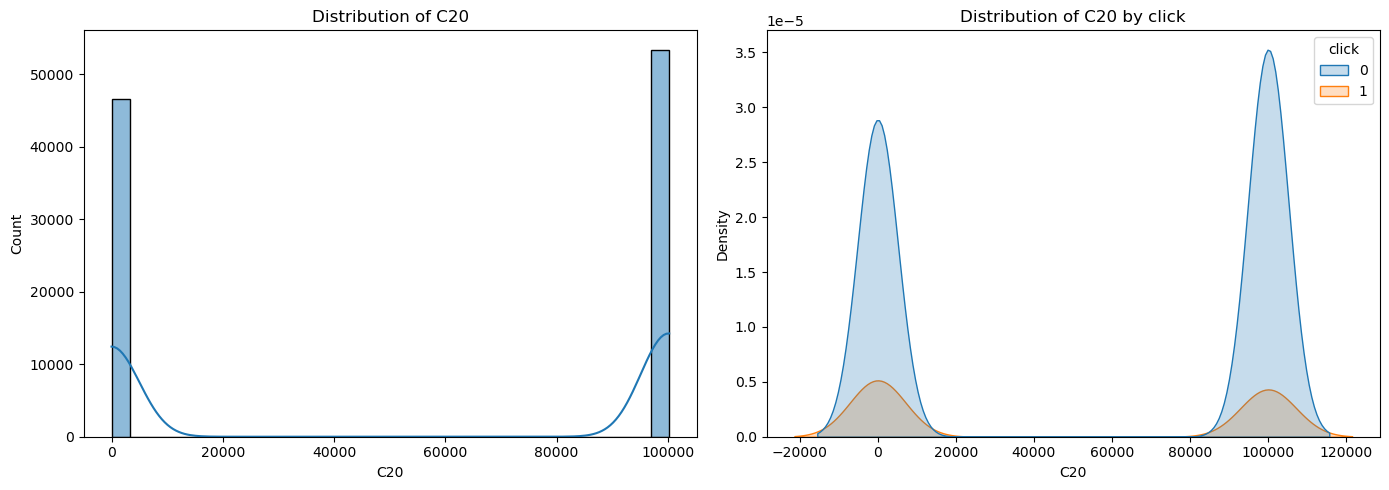

In [66]:
for col in num_cols:
    print(f"Analyzing {col}...")
    plot_numeric_distribution(df, column=col, target='click')
    print("\n" + "="*50 + "\n")

### Statistical Significance Test for Numerical Variables: ANOVA

In [67]:
alpha = 0.05

significant_numerical_cols = []
for col in num_cols:
    # Determine whether to reject or keep your null hypothesis
    if df.loc[:, col].nunique() > 1:
        F, p = f_oneway(df[df.click == 1][col].dropna(),
                    df[df.click == 0][col].dropna())
        print(col.ljust(40), ',   F-statistic=%.5f, p=%.5f' % (F, p), df.loc[:, col].nunique())
        if p <= alpha:
            significant_numerical_cols.append(col)

C14                                      ,   F-statistic=16.67148, p=0.00004 654
C17                                      ,   F-statistic=5.18391, p=0.02280 160
C20                                      ,   F-statistic=495.82316, p=0.00000 146


In [68]:
significant_numerical_cols

['C14', 'C17', 'C20']

In [69]:
significant_columns = significant_categorical_cols + significant_numerical_cols
print("Significant Columns:")
print(significant_columns)

Significant Columns:
['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C19', 'C21', 'C14', 'C17', 'C20']


C:\Users\User\AppData\Local\Temp\ipykernel_24112\2079973896.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[columns_to_plot].corr(), annot=True, fmt=".2f", cmap='YlGnBu', square=True)


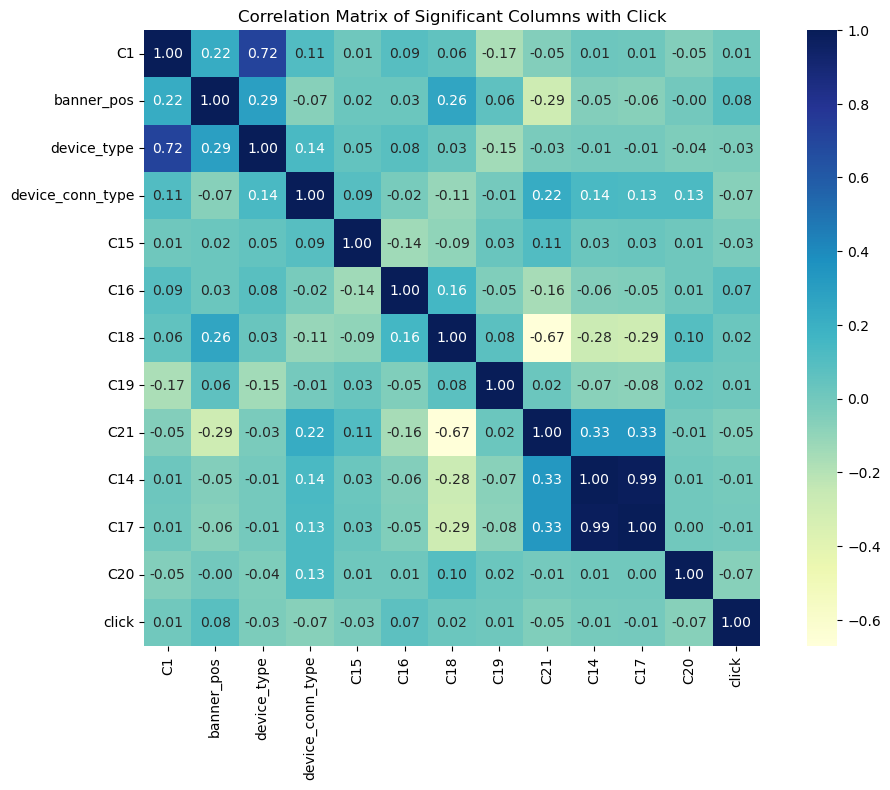

In [70]:
# Plot the correlation matrix for significant columns with the target variable Click
columns_to_plot = significant_columns + ['click']
plt.figure(figsize=(12, 8))
sns.heatmap(df[columns_to_plot].corr(), annot=True, fmt=".2f", cmap='YlGnBu', square=True)
plt.title('Correlation Matrix of Significant Columns with Click')
plt.show()

In [71]:
df[['C14', 'C17', 'click']].corr('spearman')


,C14,C17,click
C14,1.00,0.99,-0.04
C17,0.99,1.00,-0.03
click,-0.04,-0.03,1.00


In [72]:
print("Cardinality of C14:", df['C14'].nunique())
print("Cardinality of C17:", df['C17'].nunique())

Cardinality of C14: 654
Cardinality of C17: 160


**Observation:** The columns C14 and C17 are highly correlated. It is better to remove one of them. Lets drop C14 as it has high cardinality.

In [73]:
# drop C14 from the significant columns as it has high cardinality
significant_columns.remove('C14')

significant_columns

['site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'C18',
 'C19',
 'C21',
 'C17',
 'C20']

### Data Preprocessing

In [74]:
for col in significant_categorical_cols:
    print(f"Cardinality of {col}:", df[col].nunique())

Cardinality of site_id: 759
Cardinality of site_domain: 668
Cardinality of site_category: 16
Cardinality of app_id: 764
Cardinality of app_domain: 53
Cardinality of app_category: 19
Cardinality of device_id: 9915
Cardinality of device_ip: 45817
Cardinality of device_model: 2487
Cardinality of C1: 5
Cardinality of banner_pos: 6
Cardinality of device_type: 4
Cardinality of device_conn_type: 4
Cardinality of C15: 7
Cardinality of C16: 8
Cardinality of C18: 4
Cardinality of C19: 39
Cardinality of C21: 31


In [75]:
for col in significant_categorical_cols:
    print(''.ljust(40), 'Column:', col, '  Cardinality:', df[col].nunique())
    if df[col].nunique() < 10:
        print("Low cardinality")
        print('Performing one-hot encoding on', col)
        df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)
    elif df[col].nunique() < 100:
        print("Medium cardinality")
        print('Performing label encoding on', col)
        df[col] = df[col].astype('category').cat.codes
    else:
        print("High cardinality")
        print('Performing Frequency encoding on', col)
        freq_encoding = df[col].value_counts().to_dict()
        df[col] = df[col].map(freq_encoding) 
      

                                         Column: site_id   Cardinality: 759
High cardinality
Performing Frequency encoding on site_id
                                         Column: site_domain   Cardinality: 668
High cardinality
Performing Frequency encoding on site_domain
                                         Column: site_category   Cardinality: 16
Medium cardinality
Performing label encoding on site_category
                                         Column: app_id   Cardinality: 764
High cardinality
Performing Frequency encoding on app_id
                                         Column: app_domain   Cardinality: 53
Medium cardinality
Performing label encoding on app_domain
                                         Column: app_category   Cardinality: 19
Medium cardinality
Performing label encoding on app_category
                                         Column: device_id   Cardinality: 9915
High cardinality
Performing Frequency encoding on device_id
                                

In [76]:
df.columns[df.columns.str.contains('device_ip')]

Index(['device_ip'], dtype='object')

In [77]:
df.head().T

,0,1,2,3,4
click,0,0,0,0,0
site_id,8171,18535,47,29,2462
site_domain,8347,18535,48,29,3487
site_category,14,1,2,3,3
app_id,49296,49296,49296,49296,49296
app_domain,26,26,26,26,26
app_category,0,0,0,0,0
device_id,82114,82114,82114,82114,82114
device_ip,1,1,1,29,11
device_model,2097,1535,428,963,76


In [83]:
def generate_col_stats(df):
    stats = []

    for col in df.columns:
        stats.append({
            'Column': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            #'Median': df[col].median(),
            'Std Dev': df[col].std(),
            #'Variance': df[col].var(),
            'Kurtosis': df[col].kurtosis() - 3,  # Excess kurtosis
        })

    return pd.DataFrame(stats)

col_stats = generate_col_stats(df)
col_stats = col_stats.set_index('Column')
col_stats

,Minimum,Maximum,Mean,Std Dev,Kurtosis
Column,,,,,
click,0,1,0.17,0.37,-1.87
site_id,1,50704,29941.73,21826.11,-4.75
site_domain,1,52266,31634.10,22294.06,-4.73
site_category,0,15,5.85,4.32,-3.19
app_id,1,49296,26161.93,22930.98,-4.96
app_domain,0,52,21.12,10.72,-3.30
app_category,0,18,3.54,5.72,-2.17
device_id,1,82114,67429.73,31463.46,-2.19
device_ip,1,523,20.37,57.74,33.46


### Feature Standardization

In [85]:
normalizer = MinMaxScaler()
def normalize_columns(df, columns):
    df[columns] = normalizer.fit_transform(df[columns])
    return df

df = normalize_columns(df, df.columns)

col_stats = generate_col_stats(df)
col_stats = col_stats.set_index('Column')
col_stats

,Minimum,Maximum,Mean,Std Dev,Kurtosis
Column,,,,,
click,0.00,1.00,0.17,0.37,-1.87
site_id,0.00,1.00,0.59,0.43,-4.75
site_domain,0.00,1.00,0.61,0.43,-4.73
site_category,0.00,1.00,0.39,0.29,-3.19
app_id,0.00,1.00,0.53,0.47,-4.96
app_domain,0.00,1.00,0.41,0.21,-3.30
app_category,0.00,1.00,0.20,0.32,-2.17
device_id,0.00,1.00,0.82,0.38,-2.19
device_ip,0.00,1.00,0.04,0.11,33.46


In [87]:
df.head().T

,0,1,2,3,4
click,0.00,0.00,0.00,0.00,0.00
site_id,0.16,0.37,0.00,0.00,0.05
site_domain,0.16,0.35,0.00,0.00,0.07
site_category,0.93,0.07,0.13,0.20,0.20
app_id,1.00,1.00,1.00,1.00,1.00
app_domain,0.50,0.50,0.50,0.50,0.50
app_category,0.00,0.00,0.00,0.00,0.00
device_id,1.00,1.00,1.00,1.00,1.00
device_ip,0.00,0.00,0.00,0.05,0.02
device_model,0.53,0.38,0.11,0.24,0.02
